In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
df = pd.read_csv('ecoli.csv')

In [52]:
print('This dataset contains 336 rows of data about E coli and their protein sequence. The site column serves as the classes which are cp, im, imS, imL imU, om, omL, and pp')

This dataset contains 336 rows of data about E coli and their protein sequence. The site column serves as the classes which are cp, im, imS, imL imU, om, omL, and pp


In [71]:
print(df.value_counts('SITE'))
classes_to_keep = ['cp', 'im', 'pp', 'imU', 'om']
filter_df = df.loc[df.SITE.isin(classes_to_keep)]

SITE
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
dtype: int64


In [72]:
filter_df.head()

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [73]:
from sklearn.preprocessing import LabelEncoder
X = filter_df.iloc[:, 1:8].values
y = filter_df.iloc[:, 8].values
y = LabelEncoder().fit_transform(y)

In [74]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),activation='relu',max_iter=1000)

In [75]:
from sklearn.metrics import confusion_matrix
mlp.fit(X, y)
y_pred = mlp.predict(X)
confusion = confusion_matrix(y, y_pred)
print(confusion)
accuracy = mlp.score(X, y)
print(accuracy)

[[139   1   0   0   3]
 [  2  66   8   0   1]
 [  1  10  24   0   0]
 [  0   0   0  18   2]
 [  4   1   0   0  47]]
0.8990825688073395


In [76]:
hidden_layer_sizes = [(50, 25), (100, 50, 25), (100, 100), (150, 100, 50)]
activations = ['logistic', 'relu', 'tanh']
max_iters = [500, 1000, 1500]

best_accuracy = 0
best_params = {}

for layer_sizes in hidden_layer_sizes:
    for activation in activations:
        for max_iter in max_iters:
            mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, activation=activation, max_iter=max_iter)

            mlp.fit(X_train, y_train)

            accuracy = mlp.score(X_test, y_test)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'hidden_layer_sizes': layer_sizes, 'activation': activation,'max_iter': max_iter}
                
final_model = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'], activation=best_params['activation'], max_iter=best_params['max_iter'])

final_model.fit(X, y)

y_pred = final_model.predict(X)
confusion = confusion_matrix(y, y_pred)
final_accuracy = final_model.score(X, y)

print(confusion)
print(final_accuracy)

[[139   1   0   0   3]
 [  2  66   8   0   1]
 [  0  11  23   0   1]
 [  0   0   0  18   2]
 [  4   1   0   0  47]]
0.8960244648318043


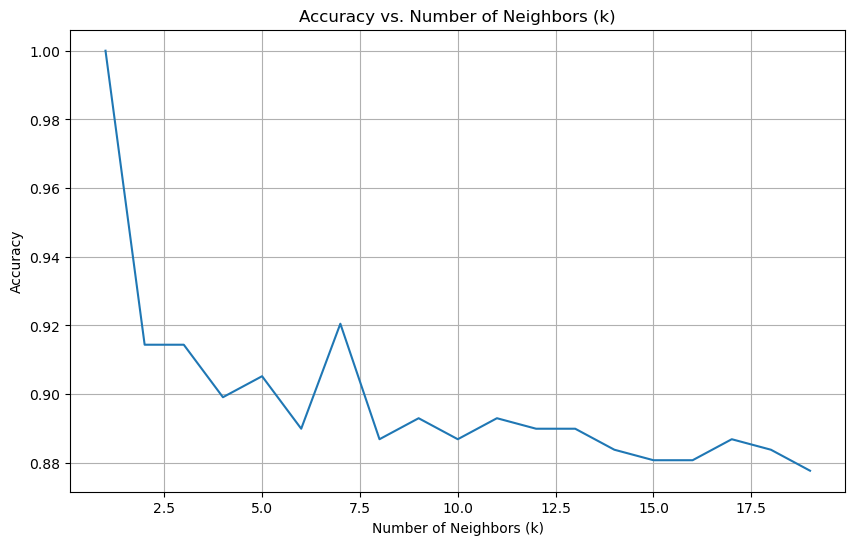

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = []
k_values = list(range(1, 20))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    accuracy = accuracy_score(y, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies)
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)
y_pred = knn.predict(X)
confusion = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(confusion)
accuracy = knn.score(X, y)
print(accuracy)

Confusion Matrix:
[[141   0   0   0   2]
 [  2  66   8   0   1]
 [  1   6  28   0   0]
 [  0   0   0  18   2]
 [  3   1   0   0  48]]
0.9204892966360856


In [93]:
print('Excluding 1 as k it appears that 7 is the best value for k which leads to an accuracy of 0.92')

Excluding 1 as k it appears that 7 is the best value for k which leads to an accuracy of 0.92


In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1000, 500, 1000),activation='relu',max_iter=2000)
mlp.fit(X, y)
y_pred = mlp.predict(X)
confusion = confusion_matrix(y, y_pred)
print(confusion)
accuracy = mlp.score(X, y)
print(accuracy)

[[141   1   0   0   1]
 [  2  69   6   0   0]
 [  0   7  28   0   0]
 [  0   0   0  18   2]
 [  4   0   0   0  48]]
0.9296636085626911
